<a href="https://colab.research.google.com/github/yoonyoung27/prac_class/blob/main/deeplearning_prac2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✓ Preparation settings : 런타임 유형 : GPU

✓ GPU 확인 : Persistance-M

In [25]:
!nvidia-smi

Sun Apr 18 03:57:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    28W /  70W |    448MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

✓ Import [Tensorflow](https://www.tensorflow.org/?hl=ko)

In [26]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

# Classifying movie reviews: a binary classification example

This notebook contains the code samples found in Chapter 3, Section 5 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff)

__Classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews__. It makes use of the Python library Keras, IMDB dataset.  
It has already been preprocessed. The reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary

✓ Ready for dataset

In [27]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

* We will use 10,000 most frequently used words
* The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words)  
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive"

In [28]:
max([max(sequence) for sequence in train_data])

9999

✓ information of dataset

In [29]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [35]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

\* Decode

In [31]:
word_index = imdb.get_word_index()                                                      # word_index is a dictionary mapping words to an integer index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])        # By reversing, it is converted to the dictionary mapping integer indices to words
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])  # How to decode the train_data[0]

* Indices were offset by 3 because 0, 1 and 2 are reserved indices for "padding(연설·글 등을 길게 만들려고 불필요하게 넣은 군더더기)", "start of sequence", and "unknown"

In [36]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

✓ Preparing data  
Make input shape same

In [37]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):  # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                     # Set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)             # Vectorized training data
x_test = vectorize_sequences(test_data)               # Vectorized testing data

y_train = np.asarray(train_labels).astype('float32')  # Vectorized training labels
y_test = np.asarray(test_labels).astype('float32')    # Vectorized testing labels

ex. [2,5,9,3,1] -> [1,1,1,0,1,0,0,0,1,0,...]  
[3,4,5] -> [0,0,0,1,1,1,0,...]

In [38]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [39]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [40]:
x_train.shape

(25000, 10000)

✓ Defining model

First, we will present our neural network with the training data, 'train_data' and 'train_labels'.

In [41]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))  #It's easy to differentiate(gradient=1 if x>0, gradient=0 if x<0)
model.add(layers.Dense(16, activation='relu'))                        #Since sigmoid has vanishing gradient problem, the model do not converge very well. So we use relu before sigmoid
model.add(layers.Dense(1, activation='sigmoid'))

* The intermediate layers will use relu as their "activation function", and the final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive)  
![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

✓ Comfile

Second, prepare for network training

In [42]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#from tensorflow.keras import optimizers
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])  # Configuring the oprimizer to modify the parameters

#from tensorflow.keras import optimizers
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])  # Defining loss funcion using custom losses and metrics

\* Setting validation testing set

In [43]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

* In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by setting apart 10,000 samples from the original training data

✓ Fit

Third, the network will learn to associate data and labels.

In [44]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5921 - accuracy: 0.7150 - val_loss: 0.4026 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3374 - accuracy: 0.9005 - val_loss: 0.3142 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2373 - accuracy: 0.9279 - val_loss: 0.2829 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1874 - accuracy: 0.9435 - val_loss: 0.2774 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1494 - accuracy: 0.9542 - val_loss: 0.2827 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1195 - accuracy: 0.9641 - val_loss: 0.2993 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1011 - accuracy: 0.9711 - val_loss: 0.3003 - val_accuracy: 0.8848
Epoch 8/20
30

* This model trains our model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples
* At the same time, it will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the validation data as the validation_data argument

✓ Analyzing  
See what happened during training from a History object returned from model.fit() method

In [45]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

* It contains 4 entries: one per metric that was being monitored, during training and during validation

\* Plot the training and validation loss side by side, as well as the training and validation accuracy by using Matplotlib

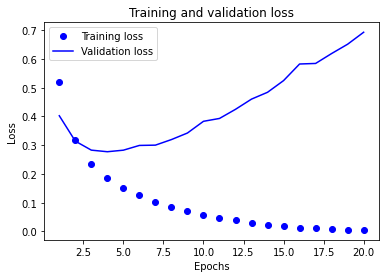

In [50]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')       # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # "b" is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

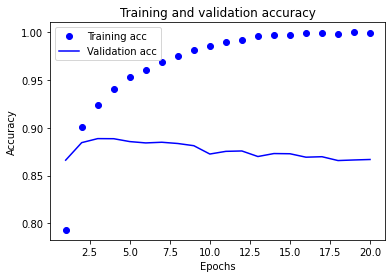

In [47]:
plt.clf()  # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

* As you can see, the training loss decreases with every epoch and the training accuracy increases with every epoch. That's what you would expect when running gradient descent optimization -- the quantity you are trying to minimize should get lower with every iteration
* But that isn't the case for the validation loss and accuracy: they seem to peak at the fourth epoch
* __overfitting__ : representations that are specific to the training data and do not generalize to data outside of the training set

✓ Make up for a problem to take a step forward

In [48]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.6206 - accuracy: 0.6520
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.3852 - accuracy: 0.8902
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2480 - accuracy: 0.9258
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2830 - accuracy: 0.8894


\* Generate the likelihood of reviews being positive by using the predict method

In [24]:
model.predict(x_test)

array([[0.19347312],
       [0.9997867 ],
       [0.8484292 ],
       ...,
       [0.13545083],
       [0.06109106],
       [0.59768623]], dtype=float32)

* This network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4)

## Further experiments

* We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
* Try to use the `mse` loss function instead of `binary_crossentropy`.
* Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.

These experiments will help convince you that the architecture choices we have made are all fairly reasonable, although they can still be 
improved!

# Conclusions


Here's what you should take away from this example:

* There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural 
network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you will 
likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a `Dense` layer with 1 unit and a `sigmoid` activation, 
i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is `binary_crossentropy`.
* The `rmsprop` optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry 
about.
* As they get better on their training data, neural networks eventually start _overfitting_ and end up obtaining increasingly worse results on data 
never-seen-before. Make sure to always monitor performance on data that is outside of the training set.
